In [1]:
%matplotlib inline
import os
import sys
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import climatools.plot.plot 

from IPython import display

In [2]:
DIR_RUN = os.path.join('/lfs1/home/jackyu/radiation/crd',
                       'LW/examples/separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'n2o',
                       'wn_20_3000',
                       'absgas_variousPTs')

path_absgas = os.path.join(DIR_RUN, 'output_absgas.dat')

In [3]:
df = pd.read_csv(path_absgas, sep=r'\s+')

df = df.set_index(['v', 'pressure', 'temperature'])

ds = xr.Dataset.from_dataframe(df)

ds = ds.stack(pt=('pressure', 'temperature'))

ds.coords['ipt'] = ('pt', range(1, ds.dims['pt'] + 1))

In [57]:
def get_abscom():
    path_abscom = os.path.join('/lfs1/home/jackyu/radiation',
                               'crd/LW/examples/separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_500_T_250_min_2.22e-20_max_1.35e-19_ng_2__P_1_T_250_ng_2_dlogN_uniform_absth3x8',
                               'wgt_.9_.7_.6_.6',
                               'midlatitude_summer__dv_.005',
                               'abscom.dat')
    srs = pd.read_csv(path_abscom, sep=r'\s+', index_col=[0]).squeeze()
    return srs


def get_absth(ref='low'):
    ighigh = 2
    abscom = get_abscom()
    
    if ref == 'low':
        return abscom[:ighigh]
    else:
        kmax = ds['absgas'].sel(pt=(1, 250)).max().values
        absth_evendlog = abscom.loc[ighigh + 1] / 8
        ratio_absth = kmax / absth_evendlog
        
        data = np.array([absth_evendlog / ratio_absth, 
                         abscom.loc[ighigh + 1]])
        srs = pd.Series(data,
                        index=range(ighigh, ighigh + 1 + 1),
                        name='abscom')
        srs.index.name = 'g'
        return srs
                     
 

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


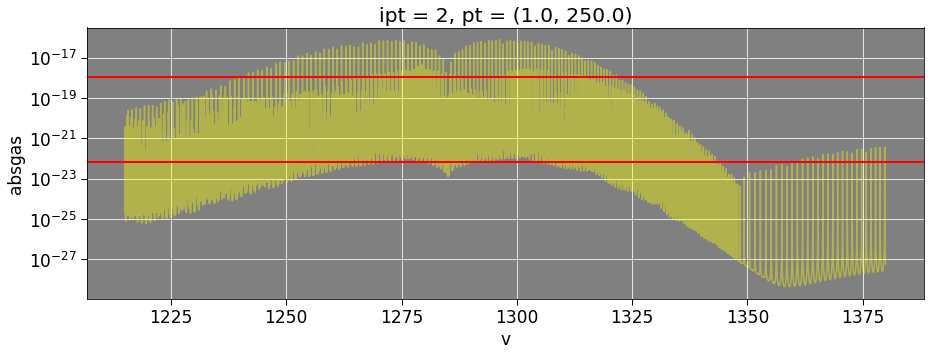

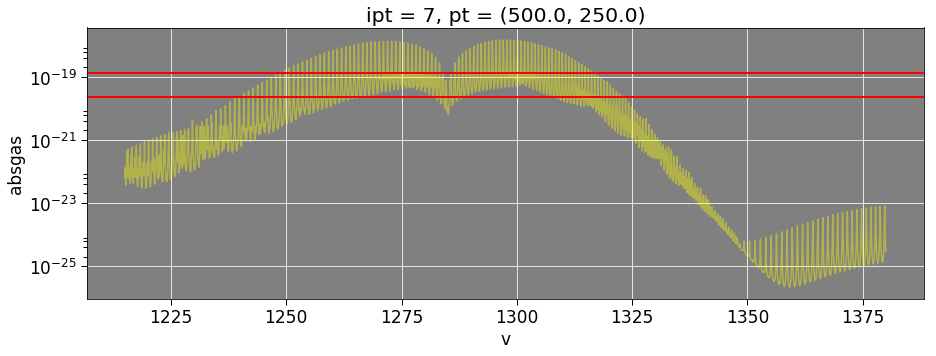

In [61]:
matplotlib.rcParams.update({'font.size': 17})

vmin, vmax = 1215, 1380

pts = [(1, 250), (500, 250)]

absths = [get_absth(ref='high'), get_absth(ref='low')]

for pt, absth in zip(pts, absths):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
    ds['absgas'].sel(pt=pt).sel(v=slice(vmin, vmax))\
    .plot(ax=ax, color='yellow', alpha=.4)
    
    ax.set_axis_bgcolor('grey')
    ax.grid(color='white')
    
    ax.get_yaxis()\
    .set_tick_params(which='major', direction='out', size=6, width=1)
    ax.get_yaxis()\
    .set_tick_params(which='minor', direction='out', size=4, width=1)
    ax.set_yscale('log')
    
    ax.get_xaxis()\
    .set_tick_params(which='major', direction='out', size=6, width=1)
    ax.get_xaxis()\
    .set_tick_params(which='minor', direction='out', size=4, width=1)
    
    for l in absth:
        ax.axhline(y=l, color='red', linewidth=2)
    
    display.display(plt.gcf())
    plt.close()

In [76]:
def save2excel():
    vmin, vmax = 1215, 1380
    df = ds['absgas'].sel(v=slice(vmin, vmax), 
                          pt=[(1, 250), (500, 250)]).to_pandas()
             
    with pd.ExcelWriter('kdist_n2o_band7.xlsx') as writer:
        df.to_excel(writer, 'kdist')
    
    


In [77]:
save2excel()

In [81]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')